In [1]:
#PDD Code
import xarray as xr
import iris
import numpy as np
import cf_units
import cftime
import datetime
from pypdd import PDDModel
import matplotlib.pyplot as plt

In [2]:
pdd = PDDModel()

In [3]:
def PDD(year):
    #Load files for tas and pr
    tas = xr.open_dataset(r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\Greenland Coordinates\tas_IPSL-CM6A-LR_combined.nc')
    pr = xr.open_dataset(r'C:\Users\Asus\Desktop\Masters Project\Uncut Data\Greenland Coordinates\pr_IPSL-CM6A-LR_combined.nc')
    #Code to select year, if 2000, code will run PDD for year 2000
    tas_data_year = tas.sel(time = tas.time.dt.year.isin([year]))
    pr_data_year = pr.sel(time = pr.time.dt.year.isin([year]))
    
    #Change to celsius 
    tas_celsius = tas_data_year['tas'] - 273.15
    
    #PDD model runs on pdd(tas,pr), extract only the pdd variable ['pdd']
    pdd_year = pdd(tas_celsius,pr_data_year['pr'])['pdd']
    
    #Take the average of the pdd for the year
    pdd_average = np.average(pdd_year)
    return pdd_average

In [4]:
#Create for loop and append to list. PDD(year) returns one value.
PDD_ds = []

for year in range(2000,2101):
    avg = PDD(year)
    PDD_ds.append(avg)
    

In [5]:
#Save the new array into csv file
from numpy import savetxt
savetxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_pr_IPSL-CM6A-LR_2000-2100.csv',PDD_ds)

Text(0, 0.5, 'Positive Degree Days)')

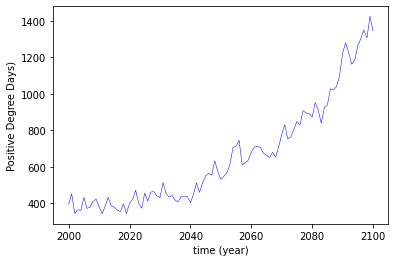

In [6]:
#Plot to check that PDD works for this model
plt.plot(range(2000,2101),PDD_ds,color='blue',linewidth=0.5,label='PDD')

plt.xlabel('time (year)')
plt.ylabel('Positive Degree Days)')

In [7]:
#Code for model mean
from numpy import loadtxt
ds1 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_ACCESS-CM2_2000-2100.csv')
ds2 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_ACCESS-ESM1-5_2000-2100.csv')
ds3 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_CanESM5_2000-2100.csv')
ds4 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_CNRM-ESM2-1_2000-2100.csv')
ds5 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_MIROC6_2000-2100.csv')
ds6 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_MRI-ESM2-0_2000-2100.csv')
ds7 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_NorESM2-LM_2000-2100.csv')
ds8 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_pr_IPSL-CM6A-LR_2000-2100.csv')
ds9 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_HadGEM3-GC31-LL_2000-2100.csv')
ds10 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_HadGEM3-GC31-MM_2000-2100.csv')
ds11 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_EC-Earth3_2000-2100.csv')
ds12 = loadtxt(r'C:\Users\Asus\Desktop\Masters Project\Data\PDD\PDD_EC-Earth3-Veg_2000-2100.csv')

In [8]:
ds_combined = (ds1+ds2+ds3+ds4+ds5+ds6+ds7+ds8+ds9+ds10+ds11+ds12)/12
print(ds_combined)

[340.70543328 371.25652994 356.47701733 337.80392673 353.57599617
 369.14573307 378.44524857 367.71643953 373.28868853 362.99077151
 375.11487253 370.23507902 384.99770105 385.14765059 389.1694002
 394.88163176 380.94659471 392.38964011 378.63771007 385.44223015
 393.09119905 408.771019   406.74583703 420.24343137 411.48823724
 405.494089   411.94013581 422.36032012 440.98224909 409.84530821
 415.36597694 432.31193537 421.8467456  421.23524875 428.94233543
 411.1680924  433.56854378 431.11217011 436.69390301 426.03868974
 411.62506539 434.77807489 455.68371667 458.25961708 456.07191807
 477.72370167 482.81616223 495.83786014 479.79366273 483.53915548
 496.50541457 471.58960567 494.48320421 518.11217963 526.32093755
 514.39646306 540.74718122 545.39282731 552.39045781 552.09629338
 571.69030559 551.98681341 536.4227054  553.60674665 532.04988291
 520.10025305 546.20645854 572.9740244  557.19125934 591.69655534
 594.30977041 629.10880254 617.36446422 628.10250422 611.40801932
 639.826505

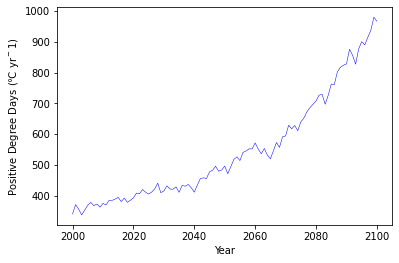

In [9]:
plt.plot(range(2000,2101),ds_combined,color='blue',linewidth=0.5,label='PDD')

plt.xlabel('Year')
plt.ylabel('Positive Degree Days (℃ yr$^-1$)')

plt.savefig(r'C:\Users\Asus\Desktop\Masters Project\Graphs\PDD_Multi-Modelv1.png', dpi = 300 , bbox_inches = 'tight')